In [3]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [14]:
#dataset create

data = [
    ("S1", 2, 120, 1),
    ("S2", 10, 450, 2),
    ("S3", 6, 300, 5),
    ("S4", 1, 90, 1),
    ("S5", 8, 220, 3),
    ("S6", 12, 500, 2),
    ("S7", 4, 150, 4),
    ("S8", 7, 350, 3),
]

In [15]:
df = pd.DataFrame(data, columns=["Student", "Books/Month", "Avg Pages/Book", "Genres Diversity"])
print(df)

  Student  Books/Month  Avg Pages/Book  Genres Diversity
0      S1            2             120                 1
1      S2           10             450                 2
2      S3            6             300                 5
3      S4            1              90                 1
4      S5            8             220                 3
5      S6           12             500                 2
6      S7            4             150                 4
7      S8            7             350                 3


In [16]:
#Feature scaling
from sklearn.preprocessing import StandardScaler

X = df[["Books/Month", "Avg Pages/Book", "Genres Diversity"]].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
#Find a good K (Elbow + Silhouette)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias, sil_scores, K_range = [], [], range(2, 7)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))



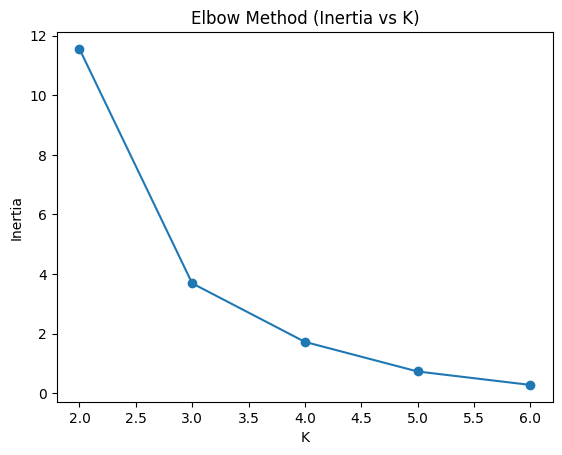

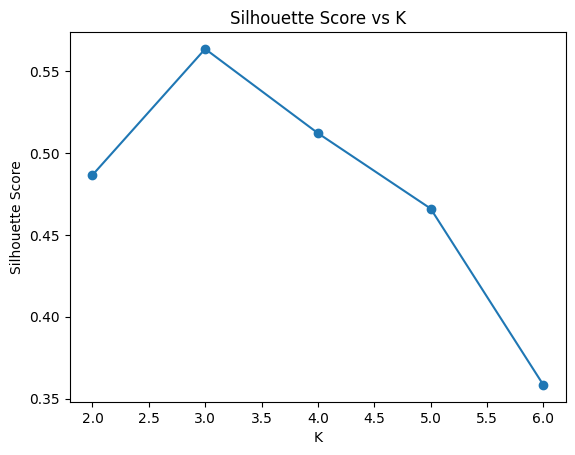

3

In [23]:
plt.figure()
plt.plot(list(K_range), inertias, marker='o')
plt.title("Elbow Method (Inertia vs K)")
plt.xlabel("K"); plt.ylabel("Inertia"); plt.show()

plt.figure()
plt.plot(list(K_range), sil_scores, marker='o')
plt.title("Silhouette Score vs K")
plt.xlabel("K"); plt.ylabel("Silhouette Score"); plt.show()

best_k = 3  # elbow + highest silhouette on this data
best_k

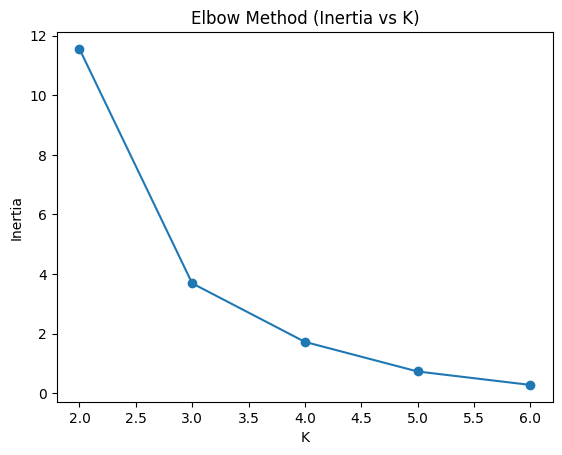

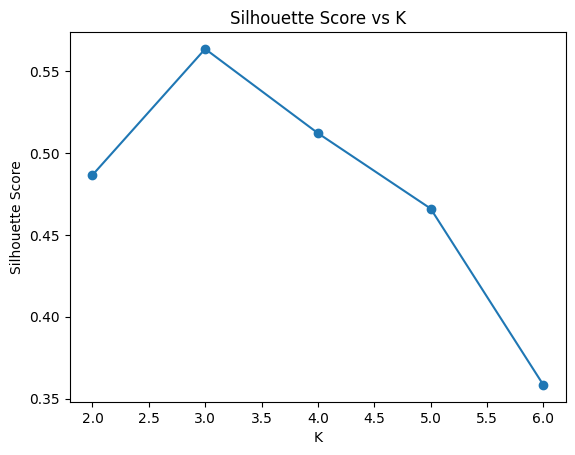

3

In [18]:
# Drop rows with NaN values
df_cleaned = df.dropna()

# Feature scaling on cleaned data
from sklearn.preprocessing import StandardScaler

X_cleaned = df_cleaned[["Books/Month", "Avg Pages/Book", "Genres Diversity"]].values
scaler = StandardScaler()
X_scaled_cleaned = scaler.fit_transform(X_cleaned)

# Find a good K (Elbow + Silhouette)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias, sil_scores, K_range = [], [], range(2, 7)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled_cleaned)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled_cleaned, labels))

plt.figure()
plt.plot(list(K_range), inertias, marker='o')
plt.title("Elbow Method (Inertia vs K)")
plt.xlabel("K"); plt.ylabel("Inertia"); plt.show()

plt.figure()
plt.plot(list(K_range), sil_scores, marker='o')
plt.title("Silhouette Score vs K")
plt.xlabel("K"); plt.ylabel("Silhouette Score"); plt.show()

best_k = 3  # elbow + highest silhouette on this data
best_k

In [19]:
#Fit KMeans, attach clusters

km = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["Cluster"] = km.fit_predict(X_scaled)

# Cluster profiles
cluster_profile = (
    df.groupby("Cluster")[["Books/Month","Avg Pages/Book","Genres Diversity"]]
      .mean().round(2)
)

In [20]:
#Name segments

def name_cluster(row):
    if row["Books/Month"] >= 9 and row["Avg Pages/Book"] >= 400:
        return "Heavy readers"
    if row["Books/Month"] <= 3 and row["Avg Pages/Book"] <= 120:
        return "Light readers"
    return "Explorers (diverse tastes)"

profile_named = cluster_profile.copy()
profile_named["Segment"] = profile_named.apply(name_cluster, axis=1)

df["Segment"] = df["Cluster"].map(profile_named["Segment"].to_dict())
df.sort_values(["Cluster","Student"]).reset_index(drop=True)

,Student,Books/Month,Avg Pages/Book,Genres Diversity,Cluster,Segment
0,S3,6,300,5,0,Explorers (diverse tastes)
1,S5,8,220,3,0,Explorers (diverse tastes)
2,S7,4,150,4,0,Explorers (diverse tastes)
3,S8,7,350,3,0,Explorers (diverse tastes)
4,S2,10,450,2,1,Heavy readers
5,S6,12,500,2,1,Heavy readers
6,S1,2,120,1,2,Light readers
7,S4,1,90,1,2,Light readers


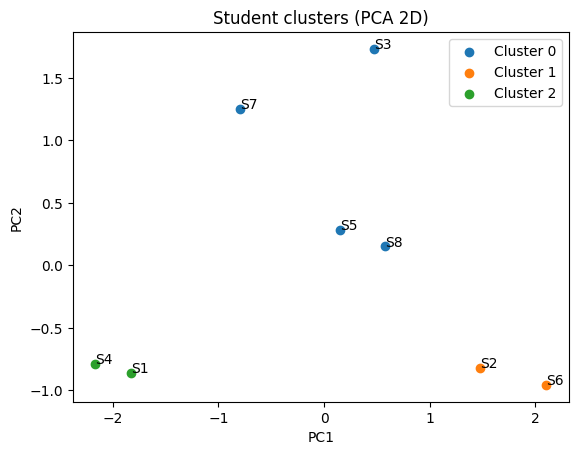

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure()
for cl in sorted(df["Cluster"].unique()):
    idx = df["Cluster"] == cl
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=f"Cluster {cl}")
for i, s in enumerate(df["Student"]):
    plt.text(X_pca[i,0], X_pca[i,1], s)
plt.title("Student clusters (PCA 2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(); plt.show()